In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
from price_path_generator import IDPriceSimulator

In [9]:
df_all_VWAP_data = pd.read_csv(
    filepath_or_buffer="../../data/all_VWAP_DA_data_spring.csv",
    sep=";"
)

# remove redundant columns
# df_all_VWAP_data = df_all_VWAP_data[[
#         "traded",
#         "delivery_start",
#         "delivery_start_hour",
#         "VWAP",
#         "DA_price",
#         "delta_VWAP_DA"
#     ]]

# set columns to datetime type
df_all_VWAP_data["delivery_start"] = pd.to_datetime(df_all_VWAP_data["delivery_start"])
df_all_VWAP_data["delivery_start_hour"] = pd.to_datetime(df_all_VWAP_data["delivery_start_hour"])
df_all_VWAP_data["traded"] = pd.to_datetime(df_all_VWAP_data["traded"])

df_all_VWAP_data

,traded,delivery_start,delivery_start_hour,VWAP,DA_price,delta_VWAP_DA,delivery_start_time,trading_>=24h_ahead,next_price_available,next_delta_VWAP_DA
0,2023-04-30 13:00:00+00:00,2023-05-01 00:00:00+00:00,2023-05-01 00:00:00+00:00,111.38,95.49,15.89,00:00:00,False,True,5.33
1,2023-04-30 14:00:00+00:00,2023-05-01 00:00:00+00:00,2023-05-01 00:00:00+00:00,94.15,95.49,-1.34,00:00:00,False,True,12.06
2,2023-04-30 14:15:00+00:00,2023-05-01 00:00:00+00:00,2023-05-01 00:00:00+00:00,107.55,95.49,12.06,00:00:00,False,True,12.99
3,2023-04-30 14:30:00+00:00,2023-05-01 00:00:00+00:00,2023-05-01 00:00:00+00:00,108.48,95.49,12.99,00:00:00,False,True,13.86
4,2023-04-30 14:45:00+00:00,2023-05-01 00:00:00+00:00,2023-05-01 00:00:00+00:00,109.35,95.49,13.86,00:00:00,False,True,13.86
...,...,...,...,...,...,...,...,...,...,...
248694,2024-05-31 22:15:00+00:00,2024-05-31 23:45:00+00:00,2024-05-31 23:00:00+00:00,78.39,88.82,-10.43,23:45:00,False,True,-6.44
248695,2024-05-31 22:30:00+00:00,2024-05-31 23:45:00+00:00,2024-05-31 23:00:00+00:00,82.38,88.82,-6.44,23:45:00,False,True,-9.01
248696,2024-05-31 22:45:00+00:00,2024-05-31 23:45:00+00:00,2024-05-31 23:00:00+00:00,79.81,88.82,-9.01,23:45:00,False,True,-9.36
248697,2024-05-31 23:00:00+00:00,2024-05-31 23:45:00+00:00,2024-05-31 23:00:00+00:00,79.46,88.82,-9.36,23:45:00,False,True,-17.35


In [10]:
price_simulator = IDPriceSimulator()
price_simulator.fit_model(df_data=df_all_VWAP_data)

/Users/rickvanvoorbergen/Mijn Drive/Studie/Masters/Thesis/battery_intraday_trading/src/price_modelling/price_path_generator.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delivery_start["resid"] = residuals
/Users/rickvanvoorbergen/Mijn Drive/Studie/Masters/Thesis/battery_intraday_trading/src/price_modelling/price_path_generator.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delivery_start["resid"] = residuals
/Users/rickvanvoorbergen/Mijn Drive/Studie/Masters/Thesis/battery_intraday_tra

KeyError: "['datetime'] not in index"

In [88]:
price_simulator.mu_plot("winter")

In [15]:
P = price_simulator.generate_paths("winter", 10000)

c:\Users\cah30\Documents\thesis\price modelling\src\ID_price_simulator\price_simulator.py:187: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbar


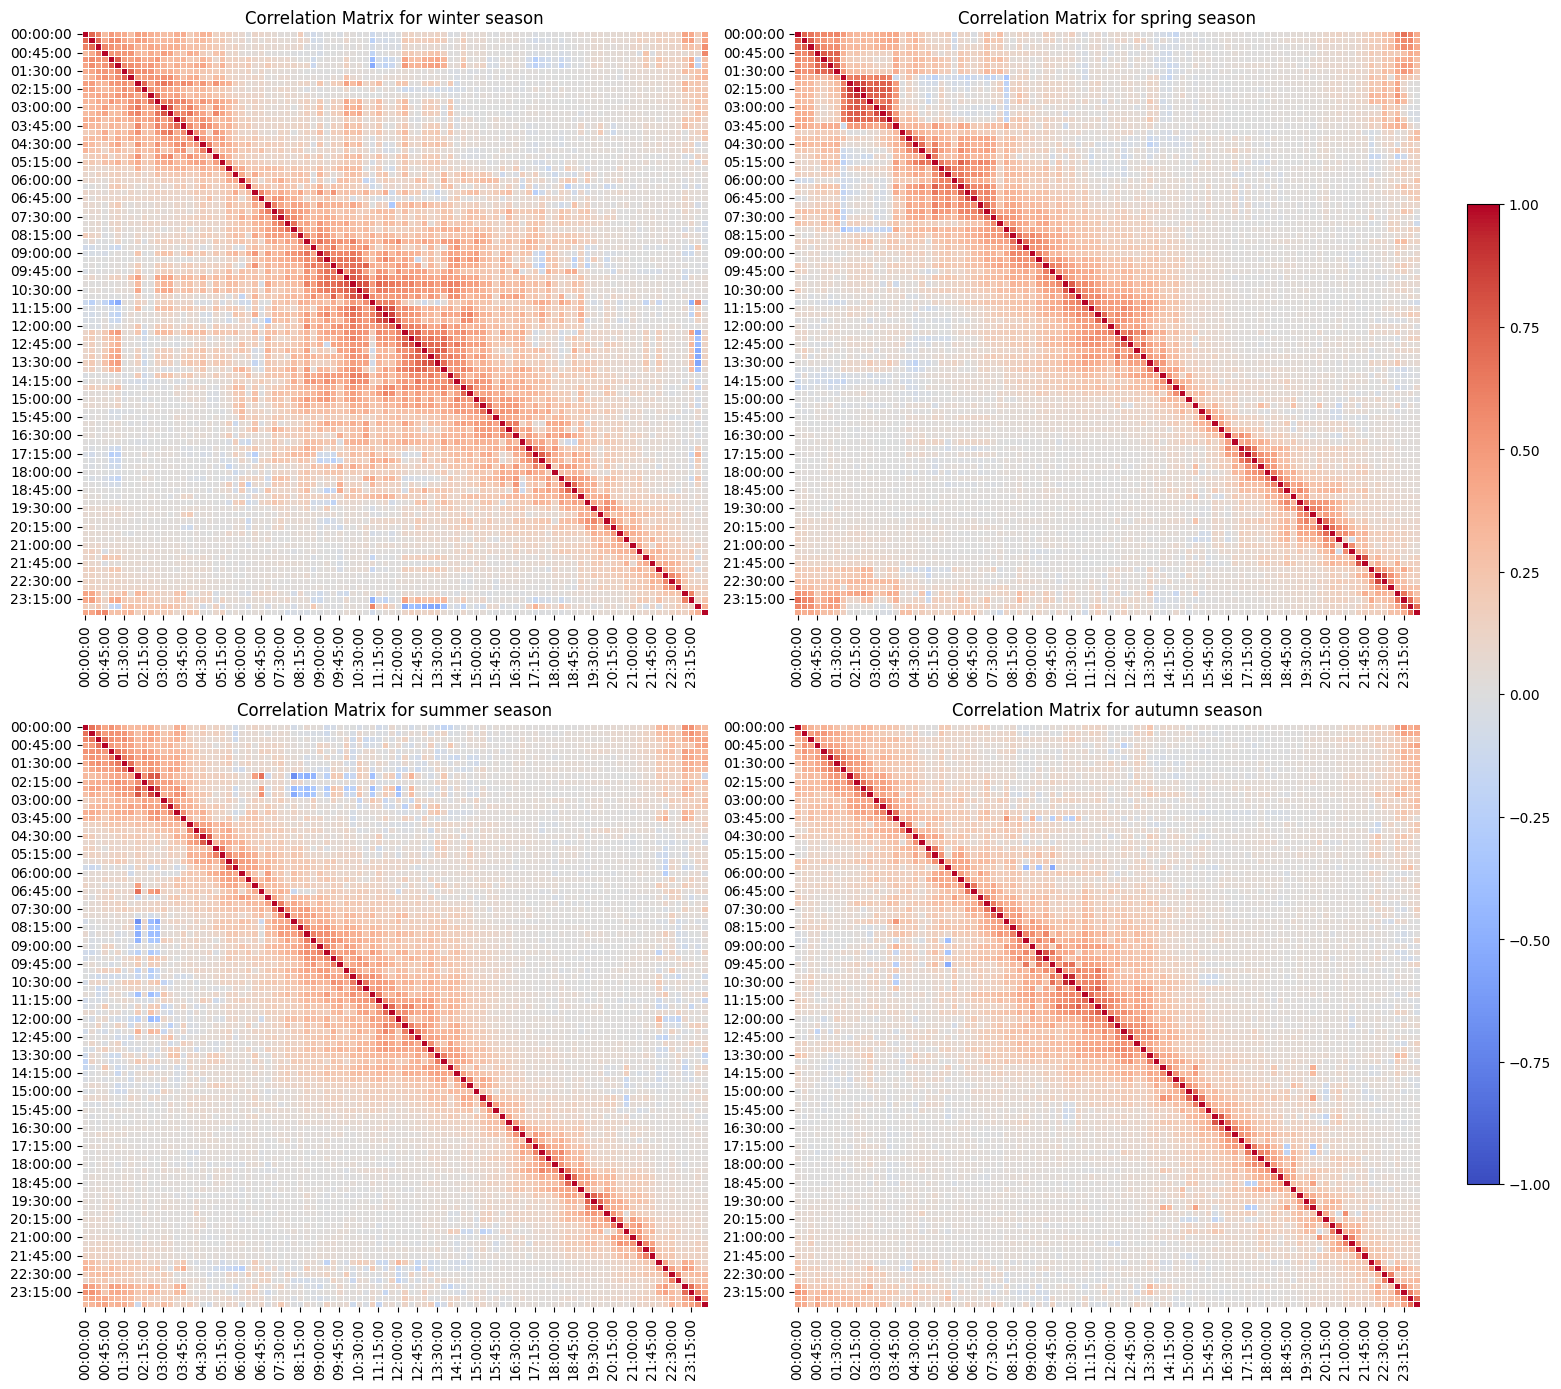

In [66]:
price_simulator.cor_heatmaps()

Fit one-dimensional OU model for every delivery period using MLE

In [99]:
# Suppress warnings
warnings.filterwarnings("ignore")

# Assuming df_all_VWAP_data is your DataFrame with the necessary data
delivery_start_times = df_all_VWAP_data["delivery_start_time"].sort_values().unique()

# Create a dictionary to hold data for each delivery start time
prices = {
    delivery_start_time: df_all_VWAP_data.loc[df_all_VWAP_data["delivery_start_time"] == delivery_start_time]
    for delivery_start_time in delivery_start_times
}

# Dictionary to store OU parameters for each delivery start time
ou_params = {}

for name, df in prices.items():    
    # Extract the series and time differences
    X = df["delta_VWAP_DA"].values
    next_X = df["next_delta_VWAP_DA"].values

    # Define the negative log-likelihood function for the OU process
    def neg_log_likelihood(params):
        theta, mu, sigma = params
        if sigma <= 0 or theta <= 0:
            return np.inf  # Return infinity if parameters are not valid
        a = np.exp(-theta)
        b = mu * (1 - a)
        residuals = next_X - (a * X + b)
        variance = (sigma ** 2) * (1 - a ** 2) / (2 * theta)
        nll = 0.5 * np.sum(np.log(2 * np.pi * variance) + (residuals ** 2) / variance)
        return nll

    # Initial parameter guesses
    initial_theta = 0.1
    initial_mu = np.mean(X)
    initial_sigma = np.std(X)
    initial_params = [initial_theta, initial_mu, initial_sigma]

    # Bounds to ensure positive theta and sigma
    bounds = [(1e-6, None), (None, None), (1e-6, None)]

    # Optimize the negative log-likelihood
    result = minimize(neg_log_likelihood, initial_params, bounds=bounds)

    if result.success:
        theta_est, mu_est, sigma_est = result.x
        # Compute residuals with estimated parameters
        a_est = np.exp(-theta_est)
        b_est = mu_est * (1 - a_est)
        residuals = next_X - (a_est * X + b_est)
        df["resid"] = residuals
        ou_params[name] = {
            'theta': theta_est,
            'mu': mu_est,
            'sigma': sigma_est,
            'df': df
        }
    else:
        print(f"Optimization failed for {name}")

Calculate correlation and covariance matrices for residuals of 1D fits

In [102]:
corr_data_init = {delivery_start_time: np.zeros(len(delivery_start_times)) for delivery_start_time in delivery_start_times}
cov_data_init = {delivery_start_time: np.zeros(len(delivery_start_times)) for delivery_start_time in delivery_start_times}

df_corr = pd.DataFrame(data=corr_data_init, index=delivery_start_times)
df_cov = pd.DataFrame(data=corr_data_init, index=delivery_start_times)


for delivery_start_time in delivery_start_times:
    for delivery_start_time_other in delivery_start_times:
        # TODO: if timedelta > threshold, correlation = 0?
        df_delivery_time = ou_params[delivery_start_time]["df"]
        df_delivery_time_other = ou_params[delivery_start_time_other]["df"]
        df_merged = pd.merge(
            left = df_delivery_time,
            right = df_delivery_time_other,
            on = ["traded", "trading_>24h_ahead"]
        )
        
        if df_merged.empty is False:
            correlation = df_merged["resid_x"].corr(df_merged["resid_y"])
            covariance = df_merged["resid_x"].cov(df_merged["resid_y"])
            df_corr.loc[delivery_start_time, delivery_start_time_other] = correlation
            df_cov.loc[delivery_start_time, delivery_start_time_other] = covariance

df_corr

,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,02:15:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
00:00:00,1.000000,0.479571,0.238826,0.208748,0.318955,0.371152,0.286601,0.279757,0.137137,0.260596,...,0.110436,0.050129,0.136621,0.187441,0.186194,0.160173,0.352843,0.310822,0.278131,0.267573
00:15:00,0.479571,1.000000,0.380205,0.348351,0.310044,0.394925,0.281884,0.317292,0.085992,0.295728,...,0.111875,0.054700,0.112597,0.181620,0.227467,0.182715,0.312718,0.321763,0.226333,0.295378
00:30:00,0.238826,0.380205,1.000000,0.493067,0.193768,0.380064,0.233695,0.344810,0.149790,0.310929,...,0.054233,0.117107,0.148693,0.130006,0.130882,0.136562,0.335731,0.216483,0.165913,0.178262
00:45:00,0.208748,0.348351,0.493067,1.000000,0.448878,0.350025,0.419117,0.340668,0.181758,0.308342,...,0.097883,0.100436,0.179298,0.182921,0.249337,0.197482,0.121248,0.272759,0.343090,0.446966
01:00:00,0.318955,0.310044,0.193768,0.448878,1.000000,0.478728,0.494813,0.370187,0.157615,0.304459,...,0.070007,0.082826,0.117703,0.166129,0.197517,0.162913,0.116163,0.286302,0.309914,0.345557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22:45:00,0.160173,0.182715,0.136562,0.197482,0.162913,0.160481,0.171236,0.152490,0.096687,0.152656,...,0.160992,0.191892,0.066733,0.331474,0.544888,1.000000,0.327805,0.283513,0.279379,0.250108
23:00:00,0.352843,0.312718,0.335731,0.121248,0.116163,0.221107,0.163938,0.230285,0.075669,0.216673,...,0.052705,0.096002,0.163100,0.194457,0.266714,0.327805,1.000000,0.436913,0.336748,0.225099
23:15:00,0.310822,0.321763,0.216483,0.272759,0.286302,0.306912,0.270938,0.261840,0.041244,0.198722,...,0.135610,0.126743,0.255358,0.280743,0.318355,0.283513,0.436913,1.000000,0.602221,0.478350
23:30:00,0.278131,0.226333,0.165913,0.343090,0.309914,0.324549,0.333896,0.284906,0.160145,0.296073,...,0.103784,0.111487,0.237232,0.255079,0.378691,0.279379,0.336748,0.602221,1.000000,0.633811


Plot correlation heatmap

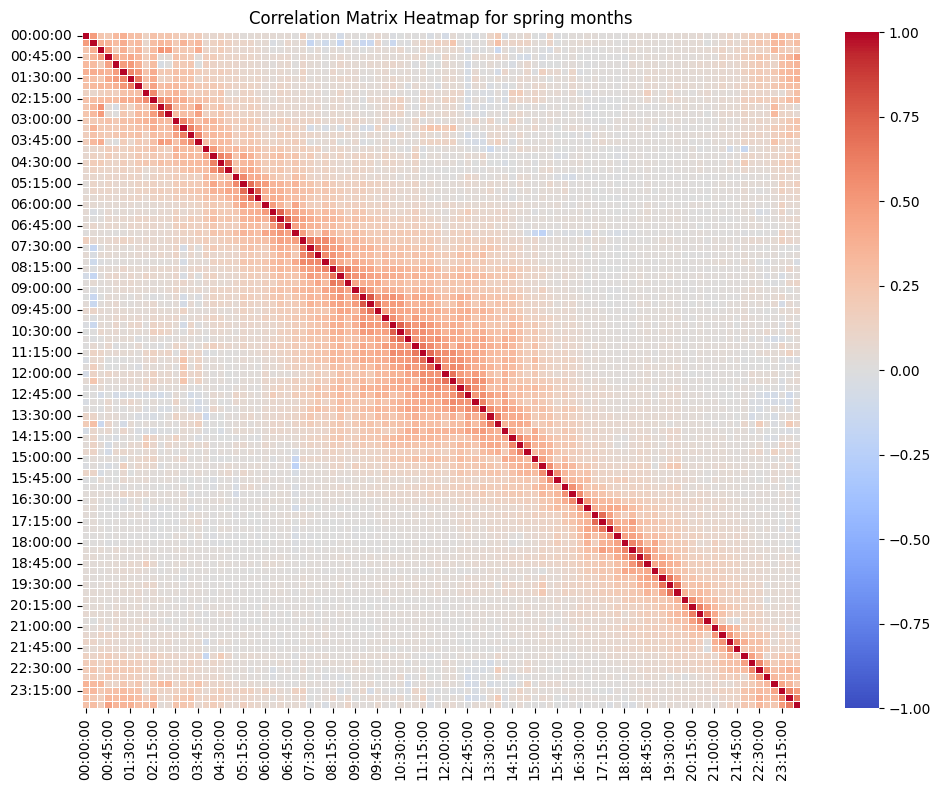

In [103]:
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df_corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1, 
                     linewidths=0.5, fmt='.2f')
plt.title(f'Correlation Matrix Heatmap for {months} months')
plt.tight_layout()
# plt.savefig(f"figs/corr_matrix_{months}.jpg", format="jpg", dpi=2000)
plt.show()

In [32]:
def is_positive_definite(B):
    """Check if a matrix is positive definite using Cholesky decomposition."""
    try:
        np.linalg.cholesky(B)
        return True
    except np.linalg.LinAlgError:
        return False

def nearest_positive_definite(A, max_iter=100, tol=1e-8):
    """
    Compute the nearest positive-definite matrix to input A using Higham's algorithm.
    
    Parameters:
    A (ndarray): Symmetric matrix to be adjusted.
    max_iter (int): Maximum number of iterations.
    tol (float): Convergence tolerance.
    
    Returns:
    ndarray: The nearest positive-definite matrix.
    """
    B = (A + A.T) / 2
    _, s, V = np.linalg.svd(B)
    H = V.T @ np.diag(s) @ V
    A2 = (B + H) / 2
    A3 = (A2 + A2.T) / 2

    if is_positive_definite(A3):
        return A3

    spacing = np.spacing(np.linalg.norm(A))
    I = np.eye(A.shape[0])
    k = 1
    while not is_positive_definite(A3):
        min_eig = np.min(np.real(np.linalg.eigvals(A3)))
        A3 += I * (-min_eig * k**2 + spacing)
        k += 1
        if k > max_iter:
            raise ValueError("Exceeded maximum iterations without convergence.")
    return A3

In [33]:
# Compute the nearest valid correlation matrix
df_cov_pd = nearest_positive_definite(df_cov)

In [34]:
params_data = {
    "mu": [ou_params[delivery_start_time]["mu"] 
           for delivery_start_time in delivery_start_times],
    "theta": [ou_params[delivery_start_time]["theta"] 
           for delivery_start_time in delivery_start_times]
    }
df_params = pd.DataFrame(data=params_data, index=delivery_start_times)
df_params

,mu,theta
00:00:00,8.022550,0.189121
00:15:00,2.540197,0.146678
00:30:00,2.709512,0.060250
00:45:00,-2.766876,0.017922
01:00:00,8.231764,0.029407
...,...,...
22:45:00,17.743676,0.007721
23:00:00,12.432611,0.105915
23:15:00,5.968388,0.092748
23:30:00,14.345326,0.018791


In [49]:
import plotly.express as px

fig = px.line(df_params, x=df_params.index, y=['mu', 'theta'], title='μ and θ versus delivery start time')
fig.update_layout(
    # yaxis_title='μ',
    xaxis_title= "delivery start time"
)


fig.show()

Generate price paths

In [50]:
# Extract parameters
mu_s = df_params["mu"].values  # Shape: (96,)
theta_s = df_params["theta"].values  # Shape: (96,)

# Number of time steps in the day
T_day = 96

# Number of time steps in trading for the next day
T_trading = 132

# Number of price paths
M = 3

P = np.zeros((M, T_day))

# Precompute the Cholesky decomposition of the covariance matrix
L = np.linalg.cholesky(df_cov_pd)

# Simulate the process
for m in range(M):
    # Initialize the state matrix
    W = np.zeros((T_trading, T_day))
    W[0] = np.zeros(T_day)
    
    for t in range(1, T_trading):
        # Generate standard normal random variables
        z = np.random.randn(T_day)
        
        # Generate correlated random variables
        eps_s = L @ z  # Shape: (96,)
        
        # Update the state
        W[t] = theta_s * mu_s + (1 - theta_s) * W[t - 1] + eps_s
  
    for t in range(T_day):
        P[m,t] = W[t+ (T_trading-T_day) ,t]

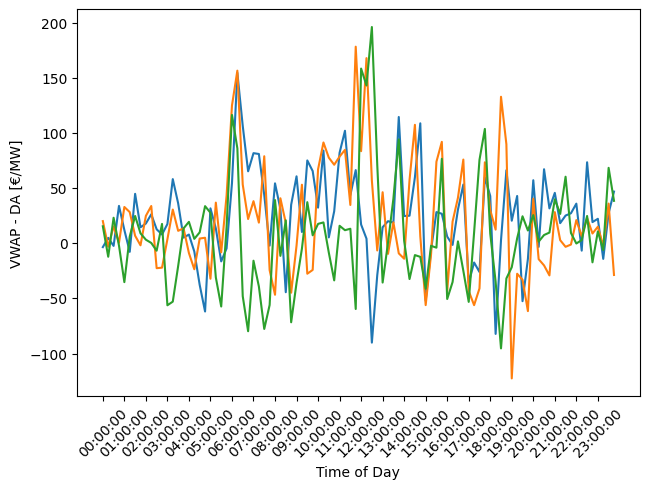

In [51]:
for m in range(M):
    plt.plot(P[m,:])

# Set the x-tick locations
plt.xticks(np.arange(len(delivery_start_times), step=4))

# Set the x-tick labels, but only show every 4th label (hourly) to avoid crowding
plt.gca().set_xticklabels(delivery_start_times[::4], rotation=45)

plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.xlabel('Time of Day')
plt.ylabel("VWAP - DA [€/MW]")
plt.show()

AR(1) regression for OU parameters

In [ ]:
# warnings.filterwarnings("ignore")

# delivery_start_times = df_all_VWAP_data["delivery_start_time"].sort_values().unique()
# # Create prices dict
# prices = {
#     delivery_start_time: df_all_VWAP_data.loc[df_all_VWAP_data["delivery_start_time"] == delivery_start_time]
#     for delivery_start_time in delivery_start_times
# }

# # Fit univariate OU (without exogenous vars) for each product
# ou_params = {}

# for name, df in prices.items():
#     X_lag = df["delta_VWAP_DA"].values.reshape(-1, 1)
#     y = df["next_delta_VWAP_DA"].values

#     reg = LinearRegression().fit(X_lag, y)

#     a = reg.coef_[0]
#     theta = -np.log(a)
#     b = reg.intercept_
#     resid = y - reg.predict(X_lag)
#     df["resid"] = resid

#     ou_params[name] = {
#         'a': a,
#         'theta': theta,
#         'mu': b/(1-a),
#         'sigma': np.std(resid),
#         'df': df
#     }